# CSV Read and Plot

*Thomas Bissinger, Hack and Harvest KN, 29.06.24*

Here, we create a simple csv file from the heat wave data. We then extract the data from the .csv file again and plot the results.

The data set can be found under *https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-heat-and-cold-spells?tab=overview*

In [1]:
# Installing all relevant libraries (if necessary)
%pip install -q numpy
%pip install -q matplotlib
%pip install -q pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Step 1: Create .csv
Data extracted from nsc by Thorsten turned into a .csv file. Data is stored in avg_rcp4_5.dat and avg_rcp8_5.dat (average number of heat waves for RCP4.5 and RCP8.5 respectively), and stddev_recp4_5.dat and stddev_recp8_5.dat (standard deviation of the same data set)

In [2]:
# Hilfsmodul: Erstelle .csv-File aus den .dat-Files von Thorsten
import numpy as np
import csv

for rcp_choice in [4.5, 8.5]:
    if rcp_choice == 4.5:
        filename = 'rcp4_5'
        modelname = 'RCP4.5'
    elif rcp_choice == 8.5:
        filename = 'rcp8_5'
        modelname = 'RCP8.5'
    avgfile_path = 'avg_' + filename + '.dat'
    stdfile_path = 'stddev_' + filename + '.dat'
    csvfile_path = filename + '.csv'
    start_year = 1986
    
    
    # Load the heat_days into a numpy array
    heat_days = np.loadtxt(avgfile_path)
    heat_days_std = np.loadtxt(stdfile_path)
    date_vals = np.arange(start_year,start_year + heat_days.size)
    # Write to a CSV file
    with open(csvfile_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Writing the header (optional)
        writer.writerow(['date', 'heat days', 'heat days std'])
        # Writing the heat_days rows
        for i in range(len(date_vals)):
            writer.writerow([date_vals[i], heat_days[i],heat_days_std[i]])

    print("Data written to " + csvfile_path)

Data written to rcp4_5.csv
Data written to rcp8_5.csv


## Step 2: Read .csv and do a simple plot
Extract the data from the .csv files just created and make a simple plot. The model can be chosen at the start. 

Loading data from file rcp8_5.csv
Saving figure to rcp8_5.png


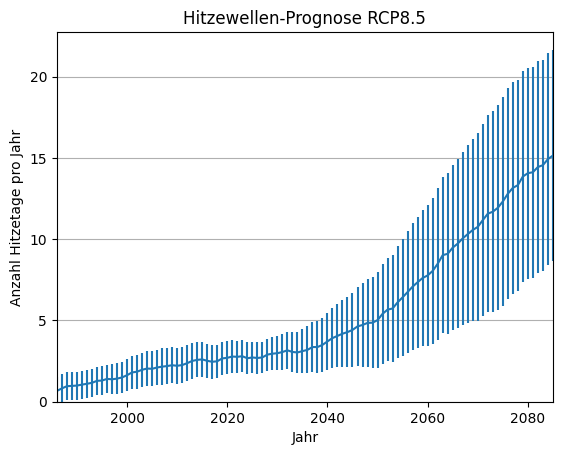

In [3]:
# Simpler Plot für einen Datensatz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
rcp_choice = 8.5
if rcp_choice == 4.5:
    filename = 'rcp4_5'
    modelname = 'RCP4.5'
elif rcp_choice == 8.5:
    filename = 'rcp8_5'
    modelname = 'RCP8.5'
# Specify the path to your CSV file
csvfile_path = filename + '.csv'
print("Loading data from file " + csvfile_path)
# Load the data into a pandas DataFrame
df = pd.read_csv(csvfile_path)

# Access specific columns
date_vals = df['date']
heat_days = df['heat days']
heat_days_std = df['heat days std']

plt.errorbar(date_vals,heat_days,heat_days_std)

plt.xlabel('Jahr')
plt.ylabel('Anzahl Hitzetage pro Jahr')
plt.title('Hitzewellen-Prognose ' + modelname)
plt.grid(axis='y')
plt.xlim(min(date_vals),max(date_vals))
plt.ylim(0,None)
plt.savefig(filename + ".png")
print("Saving figure to " + filename + ".png")
plt.show()

## Step 3: Compare different datasets in a plot
We extract data from both .csv files and compare the data in a nice-looking plot

Loading data from file rcp4_5.csv
Loading data from file rcp8_5.csv
Saving figure to rcp_compare.png


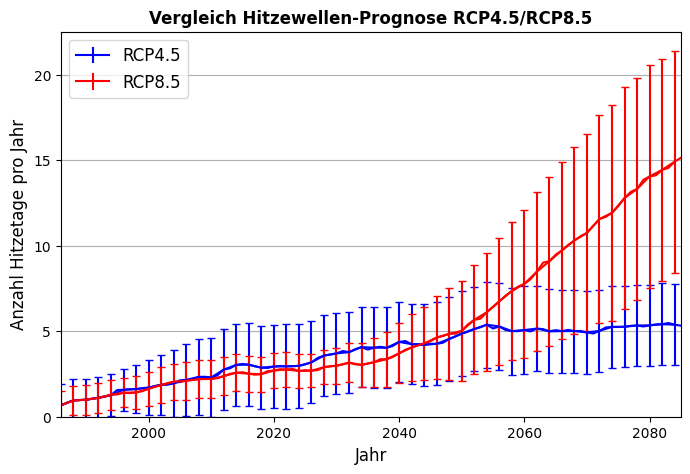

In [4]:
# Plotting two rcp-predictions side-by-side

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.close()
plt.figure(figsize=(8,5))
for rcp_choice in [4.5, 8.5]:
    if rcp_choice == 4.5:
        filename = 'rcp4_5'
        modelname = 'RCP4.5'
        pltcolor = 'blue'
    elif rcp_choice == 8.5:
        filename = 'rcp8_5'
        modelname = 'RCP8.5'
        pltcolor = 'red'
    # Specify the path to your CSV file
    csvfile_path = filename + '.csv'
    print("Loading data from file " + csvfile_path)
    # Load the data into a pandas DataFrame
    df = pd.read_csv(csvfile_path)
    
    # Access specific columns
    date_vals = df['date']
    heat_days = df['heat days']
    heat_days_std = df['heat days std']

    plt.plot(date_vals,heat_days,color=pltcolor)
    plt.errorbar(date_vals[::2],heat_days[::2],heat_days_std[::2],color=pltcolor,capsize=3) #-(rcp_choice-4.5)/45
    plt.errorbar([],[],[],color=pltcolor,label=modelname,capsize=1.5)

plt.xlabel('Jahr',fontsize=12)
plt.ylabel('Anzahl Hitzetage pro Jahr',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Vergleich Hitzewellen-Prognose RCP4.5/RCP8.5',fontweight='bold')
    
    
plt.grid(axis='y')
plt.legend(fontsize=12,loc='upper left')
plt.xlim(min(date_vals),max(date_vals))
plt.ylim(0,None)
plt.savefig("rcp_compare.png")
print("Saving figure to rcp_compare.png")
plt.show()